In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from skimpy import skim
import scipy.stats as st
import seaborn as sns
from itertools import combinations
import numpy as np

In [27]:
df = pd.read_csv("fastfood.csv")

In [28]:
df.head(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
5,Mcdonalds,Big Mac,540,250,28,10.0,1.0,80,950,46,3.0,9,25.0,10.0,2.0,15.0,Other
6,Mcdonalds,Cheeseburger,300,100,12,5.0,0.5,40,680,33,2.0,7,15.0,10.0,2.0,10.0,Other
7,Mcdonalds,Classic Chicken Sandwich,510,210,24,4.0,0.0,65,1040,49,3.0,6,25.0,0.0,4.0,2.0,Other
8,Mcdonalds,Double Cheeseburger,430,190,21,11.0,1.0,85,1040,35,2.0,7,25.0,20.0,4.0,15.0,Other
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


In [29]:
df.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [30]:
# Checking for duplicates
# Check for duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate rows based on all columns:")
print(duplicate_rows) 

Duplicate rows based on all columns:
    restaurant                         item  calories  cal_fat  total_fat  \
492  Taco Bell         Chili Cheese Burrito       380      150         17   
511  Taco Bell  Express Taco Salad w/ Chips       580      260         29   

     sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  sugar  \
492      8.0        1.0           35     930          41    5.0      2   
511      9.0        1.0           60    1270          59    8.0      7   

     protein  vit_a  vit_c  calcium  salad  
492     16.0    NaN    NaN      NaN  Other  
511     23.0    NaN    NaN      NaN  Other  


In [31]:
# Dropping duplicates
df = df.drop_duplicates()

In [32]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,501.000000,513.000000,512.000000,301.000000,305.000000,305.000000
mean,531.111111,238.945419,26.604288,8.152047,0.462963,72.553606,1247.309942,45.647173,4.127745,7.272904,27.923828,18.857143,20.170492,24.852459
std,282.900251,166.683320,18.442620,6.431223,0.840615,63.259522,691.157795,24.924070,3.038363,6.770483,17.709331,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.000000,2.000000,3.000000,15.750000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,25.000000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


Observations:
- Total count of the data = 513
- There are 5 columns with missing values
- 50% of the food in the data have a total calorie count of 490 or less.
- 50% of the total fat in the food equals to 23 or less.
- Max calorie intake for the items in the dataset = 2430
- The max fiber intake from mentioned food = 17
- Minimum sodium intake = 15
- Average vitamin c intake from fast food mentioned = 20

In [33]:
# Analysis using Skimpy
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 513    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA     ┃ NA %      ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ calories           │      0 │         0 │     530 │     280 │   20 │    330 │     690 │    2400 │   ▇█▂    │  │
│ │ cal_fat            │      0 │         0 │     240 │     170 │    0 │    120 │     310 │    1300 │   █▆▁    │  │
│ │ total_fat          │      0 │         0 │      27 │      18 │    0 │     14 │      35 │     140 │   █▆▁    │  │
│ │ sat_fat            │      0 │         0 │     8.2 │     6.4 │    0 │      4 │      11 │      47 │   █▅▁    │  │
│ │ trans_fat          │      0 │         0 │    0.46 │    0.84 │    0 │      0 │       1 │       8 │    █▁    │  │
│ │ cholesterol        │      0 │         0 │      73 │      63 │    0 │     35 │      95 │     800 │    █▁    │  │
│ │ sodium             │      0 │         0 │    1200 │     690 │   15 │    800 │    1600 │    6100 │   ▇█▁    │  │
│ │ total_carb         │      0 │         0 │      46 │      25 │    0 │     28 │      57 │     160 │   ▃█▄▂   │  │
│ │ fiber              │     12 │      2.34 │     4.1 │       3 │    0 │      2 │       5 │      17 │   ▇█▂▂   │  │
│ │ sugar              │      0 │         0 │     7.3 │     6.8 │    0 │      3 │       9 │      87 │    █▁    │  │
│ │ protein            │      1 │      0.19 │      28 │      18 │    1 │     16 │      36 │     190 │    █▄    │  │
│ │ vit_a              │    212 │     41.33 │      19 │      31 │    0 │      4 │      20 │     180 │    █▁    │  │
│ │ vit_c              │    208 │     40.55 │      20 │      31 │    0 │      4 │      30 │     400 │    █     │  │
│ │ calcium            │    208 │     40.55 │      25 │      26 │    0 │      8 │      30 │     290 │    █▁    │  │
│ └────────────────────┴────────┴───────────┴─────────┴─────────┴──────┴────────┴─────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ restaurant                │       0 │          0 │                          1.5 │                      765 │  │
│ │ item                      │       0 │          0 │                          1.5 │                      765 │  │
│ │ salad                     │       0 │          0 │  

# Handling missing data
1- Figure out if they're missing at random or not.

In [34]:
# Fill out the missing values in "protein" and "fiber" columns using the mean (since the number of missing values is little)

# Figuring out the means
protein_mean = df['protein'].mean()
fiber_mean = df['fiber'].mean()

# Filling the missing values
df['protein'].fillna(protein_mean, inplace = True)
df['fiber'].fillna(fiber_mean, inplace = True)

In [35]:
# Figuring out categorical variables
cat = df.select_dtypes(include = ['object']).columns

# A new dataframe without cat columns for analysis purposes.
df2 = df.drop(cat, axis = 1, inplace = False)

In [36]:
df2.groupby(df2['vit_a'].isnull()).mean()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
vit_a,,,,,,,,,,,,,,
False,537.009967,229.501661,25.554817,7.848837,0.455150,75.232558,1273.920266,47.534884,4.196013,8.176080,30.186047,18.857143,20.122924,24.976744
True,522.735849,252.353774,28.094340,8.582547,0.474057,68.750000,1209.528302,42.966981,4.030816,5.990566,24.711905,NaN,23.750000,15.500000


- Average calorie intake from foods with non-null vitamin A entries = 537, whereas the average intake from foods with missing vitamin A values = 522 (no significant difference).
- No significant difference in the averages for missing and not missing vitamin A values for "cal_fat", "total_fat", "sat_fat", "trans_fat", "sodium", "total_carb", "fiber", and "vit_c".
- "cholestrol", "sugar", "protein", and "calcium" seem to have a noticeable difference.

# Visual analysis from the data:
- It seems that "Burger King" doesn't provide any information regarding the vitamins contained in their foods (vit_a, vit_c), nor the calcium intake for any of the menu items they offer.
- "Taco Bell" seems to have missing vit_a, vit_c, and calcium values more than the values provided. 
- Other restaurants seem to have a couple of missing ones. However, number of missing values in these restaurants is insignificant in comaprison with Burger King and Taco Bell.

In [37]:
# Number of Unique restaurants
num_unique_rets = df['restaurant'].nunique()
print("The number of unique restaurants is: ", num_unique_rets)
print("===============================================")
unique_rets = df['restaurant'].unique()
print("Unique restaurants are: ", unique_rets)

The number of unique restaurants is:  8
Unique restaurants are:  ['Mcdonalds' 'Chick Fil-A' 'Sonic' 'Arbys' 'Burger King' 'Dairy Queen'
 'Subway' 'Taco Bell']


In [38]:
# Figuring out how many of the null values in the three columns belong to Burger King
# Find all Burger King entries
count_burger_king = (df['restaurant'] == 'Burger King').sum()
print(count_burger_king)

70


In [39]:
# Finding the number of missing values when the restaurant = Burger King
burger_king_null_entries = df[(df['restaurant'] == 'Burger King') & (df['vit_a'].isnull()) & (df['vit_c'].isnull()) & (df['calcium'].isnull())]
burger_king_null_entries
# (70/70 entries from vit_a, vit_c and calcium are missing from Burger King)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
192,Burger King,American Brewhouse King,1550,1134,126,47.0,8.0,805,1820,21,3.000000,7,134.0,NaN,NaN,NaN,Other
193,Burger King,Bacon & Swiss Sourdough King,1000,585,65,24.0,3.0,200,1320,48,2.000000,8,56.0,NaN,NaN,NaN,Other
194,Burger King,Bacon Cheeseburger,330,140,16,7.0,0.0,55,830,32,1.000000,7,18.0,NaN,NaN,NaN,Other
195,Burger King,Bacon Cheeseburger Deluxe,290,120,14,6.0,0.5,40,720,28,1.000000,7,12.0,NaN,NaN,NaN,Other
196,Burger King,Bacon King,1040,630,48,28.0,2.5,220,1900,48,1.000000,10,57.0,NaN,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Burger King,4 Piece Spicy Chicken Nuggets,210,135,15,3.0,0.0,20,570,11,2.000000,0,8.0,NaN,NaN,NaN,Other
258,Burger King,Spicy Chicken Nuggets,530,333,37,7.0,0.0,55,1420,28,4.127745,0,20.0,NaN,NaN,NaN,Other
259,Burger King,Spicy Crispy Chicken Jr.,410,220,25,4.5,0.0,35,850,35,2.000000,5,12.0,NaN,NaN,NaN,Other
260,Burger King,Spicy Crispy Chicken Sandwich,700,378,42,7.0,0.0,65,1140,57,3.000000,8,25.0,NaN,NaN,NaN,Other


In [40]:
# Looping through the remaining restaurants to figure out the number of missing values in each of the three columns.
# Looping to make sure we've captured all the missing values not only the places where values are missing from all three.

restaurants = ['Mcdonalds','Chick Fil-A', 'Sonic', 'Arbys', 'Dairy Queen', 'Subway', 'Taco Bell']

for rest in restaurants:
    # Filter the DataFrame for the current restaurant
    restaurant_data = df[df['restaurant'] == rest]
    
    # Calculate the number of missing values in each column for the current restaurant and the total entries for this restaurant.
    missing_vit_a = restaurant_data['vit_a'].isnull().sum()
    missing_vit_c = restaurant_data['vit_c'].isnull().sum()
    missing_calcium = restaurant_data['calcium'].isnull().sum()
    Total_entries = (df['restaurant'] == rest).sum()
    
    # Print the results
    print(f"For restaurant {rest}:")
    print(f"The number of missing values in column vit_a is {missing_vit_a}")
    print(f"The number of missing values in column vit_c is {missing_vit_c}")
    print(f"The number of missing values in column calcium is {missing_calcium}")
    print(f"Total entries for this restaurnt are {Total_entries}")
    print(f"")
    print()

For restaurant Mcdonalds:
The number of missing values in column vit_a is 0
The number of missing values in column vit_c is 0
The number of missing values in column calcium is 0
Total entries for this restaurnt are 57


For restaurant Chick Fil-A:
The number of missing values in column vit_a is 6
The number of missing values in column vit_c is 2
The number of missing values in column calcium is 2
Total entries for this restaurnt are 27


For restaurant Sonic:
The number of missing values in column vit_a is 4
The number of missing values in column vit_c is 4
The number of missing values in column calcium is 4
Total entries for this restaurnt are 53


For restaurant Arbys:
The number of missing values in column vit_a is 30
The number of missing values in column vit_c is 30
The number of missing values in column calcium is 30
Total entries for this restaurnt are 55


For restaurant Dairy Queen:
The number of missing values in column vit_a is 15
The number of missing values in column vit_c

In [41]:
# Since there are no additional nutrition values for Burger King and they're all empty, the values are filled with zeros instead.
df.loc[df['restaurant'] == 'Burger King', ['vit_a', 'vit_c', 'calcium']] = 0

- Plotting the restaurants with missing values to figure out the distribution for each of the columns
- Using mean imputing is not ideal in case of nutrition values 
- If the three columns seem to have the same distribution, using the mean is reasonable.
- If distribution is highly skewed, using median is more of a fit method.

# Univariate Statistical analysis:
- On each of the nutrition columns for each restaurant.

In [42]:
# Function for outlier detection
def outlier(x):  # Calculating Quartiles
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1  # Calculating the IQR
    lower_fence = q1 - 1.5 * iqr # Calculating the lower fence 
    upper_fence = q3 + 1.5 * iqr # Calculating the upper fence
    

    non_outlier = []  # If datapoint falls within the upper and lower fence its considered a non_outlier
    for num in x:
        if num >= lower_fence and num <= upper_fence:
            non_outlier.append(num)
    lower_whisker = np.min(non_outlier) # The lower and upper whiskers are calculated as the minimum and maximum values within the non_outlier list, respectively.
    upper_whisker = np.max(non_outlier)
    
    
    outlier = [] # If datapoint doesn't fall within the upper and lower fence its considered an outlier
    for num in x:
        if num < lower_fence or num > upper_fence:
            outlier.append(num)
    
    outlier_count = len(outlier)
    
    print('lower_whisker: {}'.format(lower_whisker))
    print('upper_whisker: {}'.format(upper_whisker))
    print('outlier counts: {}'.format(outlier_count))

Distribution for vit_a column for restaurant Chick Fil-A:


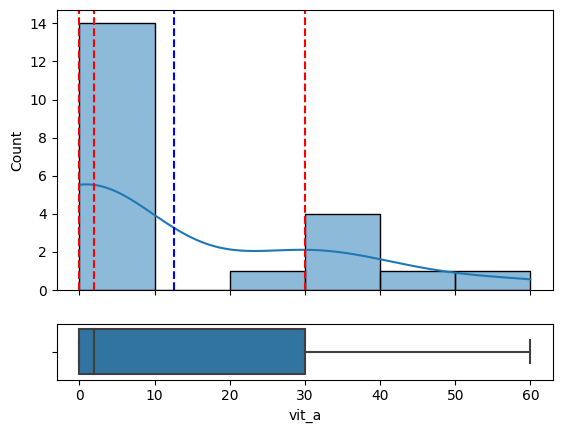

lower_whisker: 0.0
upper_whisker: 60.0
outlier counts: 0
Data skewed with skew: 2.390600068626601
Data not normal
--------------------------------------------------
Distribution for vit_c column for restaurant Chick Fil-A:


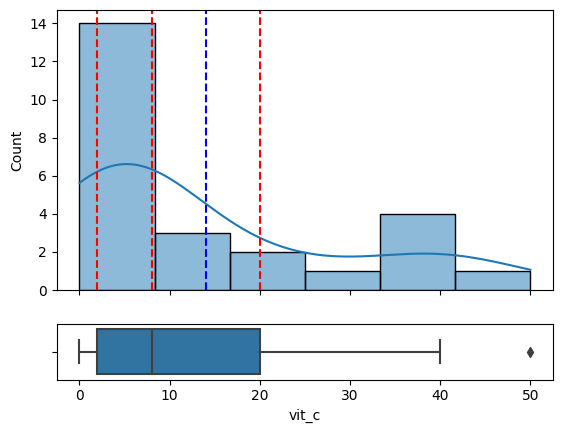

lower_whisker: 0.0
upper_whisker: 40.0
outlier counts: 1
Data skewed with skew: 2.3708148693752684
Data normal
--------------------------------------------------
Distribution for calcium column for restaurant Chick Fil-A:


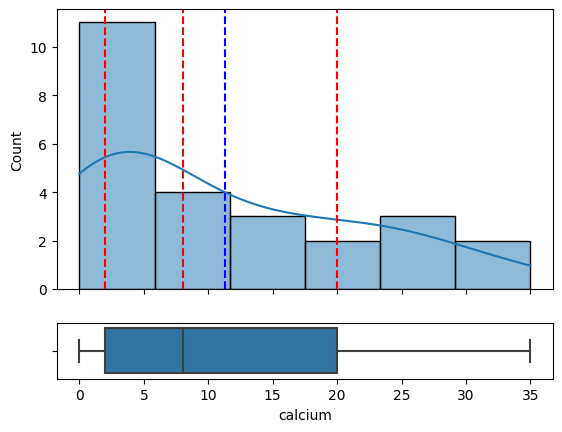

lower_whisker: 0.0
upper_whisker: 35.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for vit_a column for restaurant Sonic:


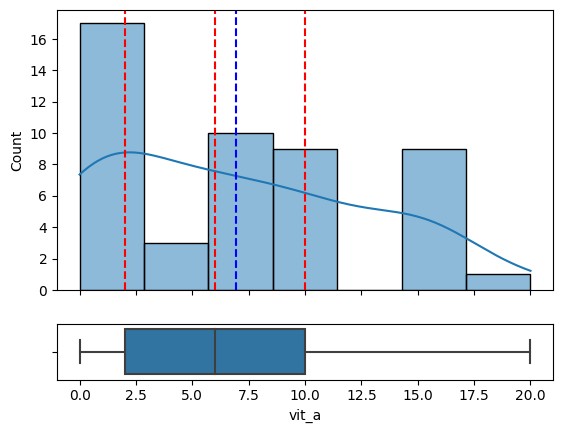

lower_whisker: 0.0
upper_whisker: 20.0
outlier counts: 0
Data not skewed
Data not normal
--------------------------------------------------
Distribution for vit_c column for restaurant Sonic:


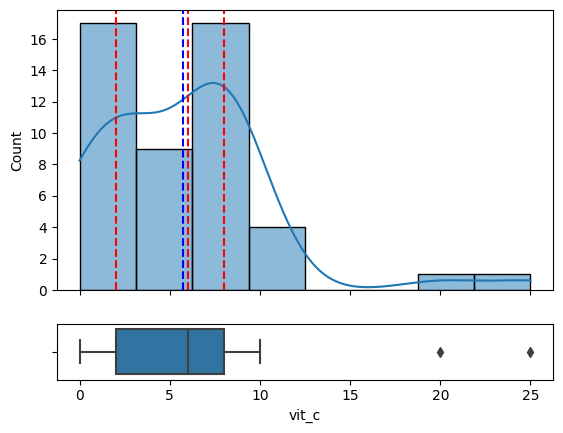

lower_whisker: 0.0
upper_whisker: 10.0
outlier counts: 2
Data skewed with skew: 4.032734609429464
Data not normal
--------------------------------------------------
Distribution for calcium column for restaurant Sonic:


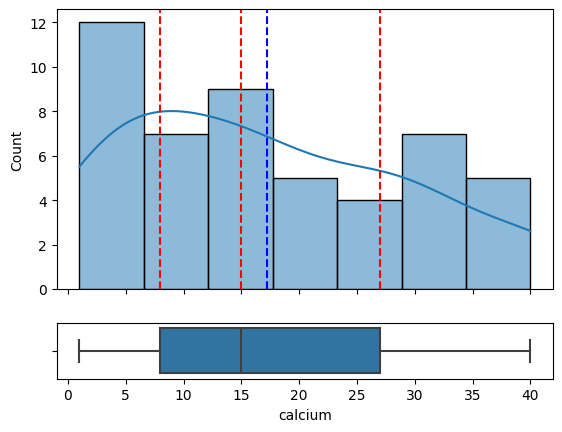

lower_whisker: 1.0
upper_whisker: 40.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for vit_a column for restaurant Arbys:


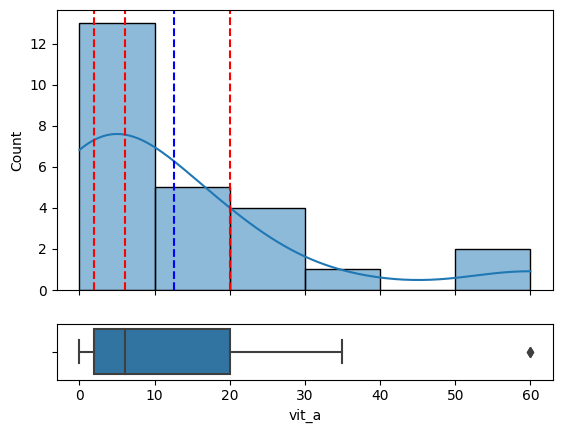

lower_whisker: 0.0
upper_whisker: 35.0
outlier counts: 2
Data skewed with skew: 3.573934085070312
Data not normal
--------------------------------------------------
Distribution for vit_c column for restaurant Arbys:


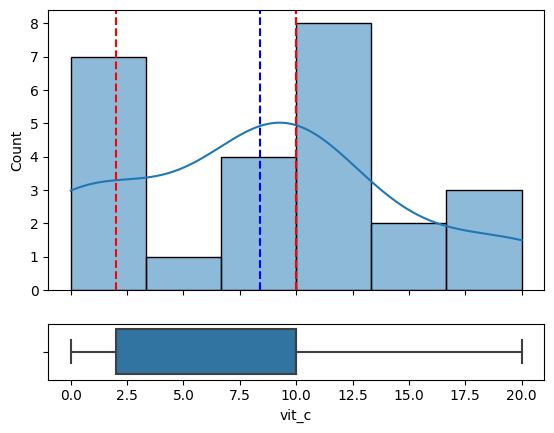

lower_whisker: 0.0
upper_whisker: 20.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for calcium column for restaurant Arbys:


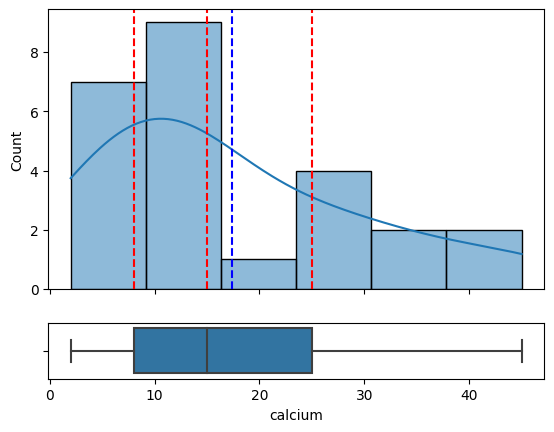

lower_whisker: 2.0
upper_whisker: 45.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for vit_a column for restaurant Dairy Queen:


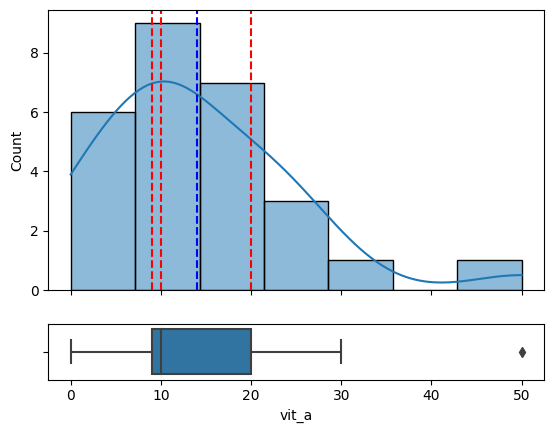

lower_whisker: 0.0
upper_whisker: 30.0
outlier counts: 1
Data skewed with skew: 2.7584894378240485
Data not normal
--------------------------------------------------
Distribution for vit_c column for restaurant Dairy Queen:


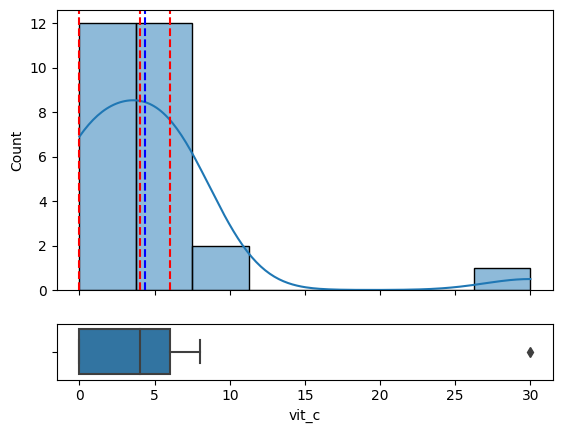

lower_whisker: 0.0
upper_whisker: 8.0
outlier counts: 1
Data skewed with skew: 5.002928571418825
Data not normal
--------------------------------------------------
Distribution for calcium column for restaurant Dairy Queen:


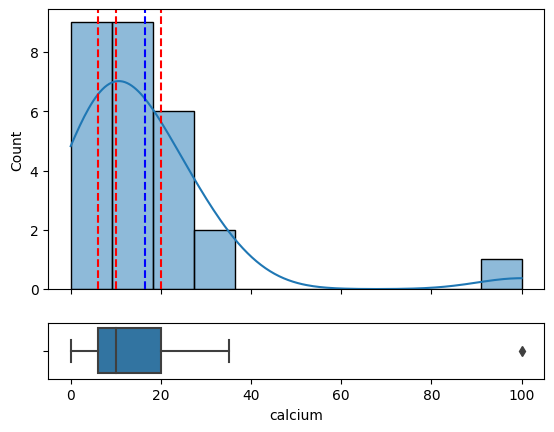

lower_whisker: 0.0
upper_whisker: 35.0
outlier counts: 1
Data skewed with skew: 5.129863694975545
Data not normal
--------------------------------------------------
Distribution for vit_a column for restaurant Taco Bell:


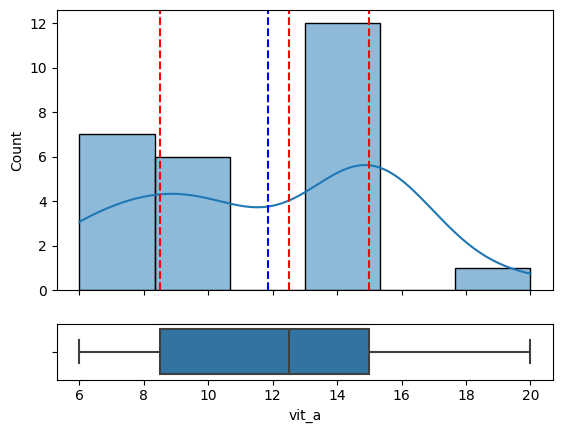

lower_whisker: 6.0
upper_whisker: 20.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for vit_c column for restaurant Taco Bell:


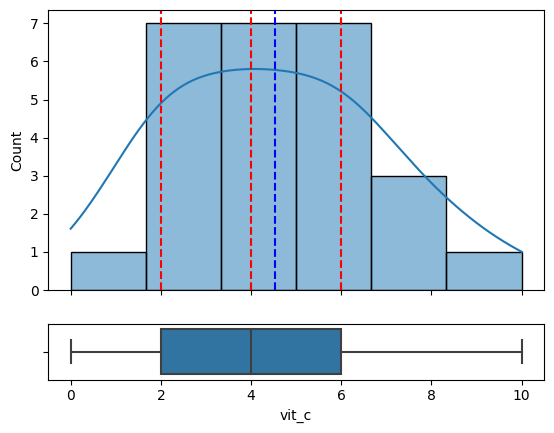

lower_whisker: 0.0
upper_whisker: 10.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
Distribution for calcium column for restaurant Taco Bell:


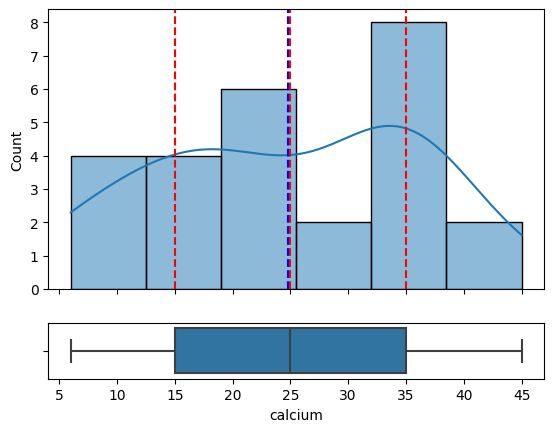

lower_whisker: 6.0
upper_whisker: 45.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------


In [43]:
# Looping through each column for each restaurant to figure out the distribution.

numerical_cols = ["vit_a", "vit_c", "calcium"] # Columns to show the distribution of

restaurants_to_analyze = ["Chick Fil-A", "Sonic", "Arbys", "Dairy Queen", "Taco Bell"] # Restaurants with missing values

# Loop through numerical columns for each restaurant
for restaurant in restaurants_to_analyze:
    for column in numerical_cols:
        print(f'Distribution for {column} column for restaurant {restaurant}:')
        
        # Filter the DataFrame for the current restaurant and column
        restaurant_data = df[(df['restaurant'] == restaurant) & ~df[column].isnull()]
        
        # Create subplots for histogram and box plot
        fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [5, 1]})
        
        # Histogram with percentiles and mean lines
        sns.histplot(data=restaurant_data, x=column, kde=True, ax=ax[0])
        ax[0].axvline(np.nanpercentile(restaurant_data[column], 25), c='red', linestyle='--')
        ax[0].axvline(np.nanpercentile(restaurant_data[column], 50), c='red', linestyle='--')
        ax[0].axvline(np.nanpercentile(restaurant_data[column], 75), c='red', linestyle='--')
        ax[0].axvline(np.mean(restaurant_data[column]), c='blue', linestyle='--')
        
        # Box plot
        sns.boxplot(data = restaurant_data, x = column, ax=ax[1])
        ax[1].set_xlabel(f'{column}')
        plt.show()
        
        # Outlier detection
        outlier(restaurant_data[column])
        
        # Skewness test
        sk, pval = st.skewtest(restaurant_data[column])
        if pval < 0.05:
            print(f'Data skewed with skew: {sk}')
        else:
            print(f'Data not skewed')
        
        # Normality test
        norm, pval = st.normaltest(restaurant_data[column])
        if pval < 0.05:
            print(f'Data not normal')
        else:
            print(f'Data normal')
        
        print('-' * 50)

In [44]:
# Printing without the plots to best read the data.

numerical_cols = ["vit_a", "vit_c", "calcium"] 

restaurants_to_analyze = ["Chick Fil-A", "Sonic", "Arbys", "Dairy Queen", "Taco Bell"] # Restaurants with missing values

# Loop through numerical columns for each restaurant
for restaurant in restaurants_to_analyze:
    print("$"*100)
    for column in numerical_cols:
        print(f'Distribution for {column} column for restaurant {restaurant}:')
        
        # Filter the DataFrame for the current restaurant and column
        restaurant_data = df[(df['restaurant'] == restaurant) & ~df[column].isnull()]
    
        # Outlier detection
        outlier(restaurant_data[column])
        
        # Skewness test
        sk, pval = st.skewtest(restaurant_data[column])
        if pval < 0.05:
            print(f'Data skewed with skew: {sk}')
        else:
            print(f'Data not skewed')
        
        # Normality test
        norm, pval = st.normaltest(restaurant_data[column])
        if pval < 0.05:
            print(f'Data not normal')
        else:
            print(f'Data normal')
        
        print('-' * 50)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Distribution for vit_a column for restaurant Chick Fil-A:
lower_whisker: 0.0
upper_whisker: 60.0
outlier counts: 0
Data skewed with skew: 2.390600068626601
Data not normal
--------------------------------------------------
Distribution for vit_c column for restaurant Chick Fil-A:
lower_whisker: 0.0
upper_whisker: 40.0
outlier counts: 1
Data skewed with skew: 2.3708148693752684
Data normal
--------------------------------------------------
Distribution for calcium column for restaurant Chick Fil-A:
lower_whisker: 0.0
upper_whisker: 35.0
outlier counts: 0
Data not skewed
Data normal
--------------------------------------------------
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Distribution for vit_a column for restaurant Sonic:
lower_whisker: 0.0
upper_whisker: 20.0
outlier counts: 0
Data not skewed
Data not normal
------------------

Chick Fil-A:
- vit_a: Median to fill the missing values since the distribution is not normal. 
- vit_c: Mean to fill the missing values since the distribution is normal.
- calcium: Mean to fill out the missing values since the distribution is normal.

In [45]:
# Chick Fil-A

# Columns with missing data
cols = ['vit_a', 'vit_c', "calcium"]

# Restaurant
restaurant_name = 'Chick Fil-A'

for col in cols:
    if col == 'vit_c' or col == 'calcium':
        med_val = df[df['restaurant'] == restaurant_name][col].median()
        df.loc[(df['restaurant'] == restaurant_name) & (df[col].isnull()), col] = med_val
    else:
        mean_val = df[df['restaurant'] == restaurant_name][col].mean()
        df.loc[(df['restaurant'] == restaurant_name) & (df[col].isnull()), col] = mean_val

# Verify that missing values have been filled
print("Missing values filled for Chick Fil-A:")
print(df[df['restaurant'] == restaurant_name][cols])


Missing values filled for Chick Fil-A:
        vit_a  vit_c  calcium
57  30.000000   40.0     25.0
58  25.000000   40.0     10.0
59  12.619048    0.0      2.0
60   0.000000    0.0      2.0
61   0.000000    2.0      4.0
62   2.000000    2.0      6.0
63   2.000000    4.0      8.0
64  30.000000   10.0     20.0
65   0.000000    2.0      2.0
66   0.000000    4.0      2.0
67   0.000000    2.0      4.0
68   0.000000    8.0      4.0
69  12.619048   20.0     10.0
70  35.000000    8.0     15.0
71   2.000000    4.0     15.0
72   0.000000    6.0      0.0
73   0.000000    8.0      0.0
74   0.000000   10.0      2.0
75   0.000000   20.0      2.0
76  12.619048   25.0     25.0
77  12.619048   50.0     25.0
78  45.000000   40.0     20.0
79   4.000000    2.0     15.0
80  30.000000   10.0     30.0
81  60.000000   35.0     35.0
82  12.619048    8.0      8.0
83  12.619048    8.0      8.0


Sonic:
- vit_a: Data is not skewed but is not normally distributed, fill with median. (median does not require the data to be normally distributed)
- vit_c: Skewed and not normal, fill with median
- calcium: Not skewed and is normally distributed, fill with mean.

In [46]:
# Sonic
restaurant_name_2 = 'Sonic'

for col in cols:
    if col == 'vit_a' or col == 'vit_c':
        med_val = df[df['restaurant'] == restaurant_name_2][col].median()
        df.loc[(df['restaurant'] == restaurant_name_2) & (df[col].isnull()), col] = med_val
    else:
        mean_val = df[df['restaurant'] == restaurant_name_2][col].mean()
        df.loc[(df['restaurant'] == restaurant_name_2) & (df[col].isnull()), col] = mean_val

# Verify that missing values have been filled
print("Missing values filled for Sonic:")
print(df[df['restaurant'] == restaurant_name][cols])

Missing values filled for Sonic:
        vit_a  vit_c  calcium
57  30.000000   40.0     25.0
58  25.000000   40.0     10.0
59  12.619048    0.0      2.0
60   0.000000    0.0      2.0
61   0.000000    2.0      4.0
62   2.000000    2.0      6.0
63   2.000000    4.0      8.0
64  30.000000   10.0     20.0
65   0.000000    2.0      2.0
66   0.000000    4.0      2.0
67   0.000000    2.0      4.0
68   0.000000    8.0      4.0
69  12.619048   20.0     10.0
70  35.000000    8.0     15.0
71   2.000000    4.0     15.0
72   0.000000    6.0      0.0
73   0.000000    8.0      0.0
74   0.000000   10.0      2.0
75   0.000000   20.0      2.0
76  12.619048   25.0     25.0
77  12.619048   50.0     25.0
78  45.000000   40.0     20.0
79   4.000000    2.0     15.0
80  30.000000   10.0     30.0
81  60.000000   35.0     35.0
82  12.619048    8.0      8.0
83  12.619048    8.0      8.0


Arbys:
- vit_a: Data is skewed and not normal, fill with median.
- vit_c: Data is not skewed and is normal, fill with mean.
- calcium: Data is not skewed and is normal, fill with mean.

In [47]:
# Arbys
restaurant_name_3 = 'Arbys'

for col in cols:
    if col == "vit_a":
        median_value = df[df['restaurant'] == restaurant_name_3][col].median()
        df.loc[(df['restaurant'] == restaurant_name_3) & (df[col].isnull()), col] = median_value
    elif col == "vit_c" or col == "calcium":
        mean_value = df[df['restaurant'] == restaurant_name_3][col].mean()
        df.loc[(df['restaurant'] == restaurant_name_3) & (df[col].isnull()), col] = mean_value

# Verify that missing values have been filled
print("Missing values filled for Arbys:")
print(df[df['restaurant'] == restaurant_name_3][cols])

Missing values filled for Arbys:
     vit_a  vit_c  calcium
137    2.0    0.0     8.00
138    4.0   10.0    10.00
139    2.0    2.0    15.00
140    2.0    2.0    15.00
141    6.0    8.4    17.36
142    6.0    8.4    17.36
143    6.0    8.4    17.36
144    6.0    8.4    17.36
145    6.0    8.4    17.36
146    6.0    8.4    17.36
147    6.0    8.4    17.36
148    2.0    8.0    15.00
149    0.0    0.0     6.00
150    0.0    0.0     6.00
151    6.0    8.4    17.36
152   15.0   10.0    15.00
153    6.0    8.4    17.36
154    6.0    8.4    17.36
155    6.0    8.4    17.36
156    6.0    8.4    17.36
157    2.0    0.0    15.00
158    6.0    8.4    17.36
159    6.0    8.4    17.36
160   10.0    8.0    25.00
161    0.0    0.0     2.00
162    0.0    4.0     2.00
163    0.0    8.0     2.00
164    6.0   20.0    35.00
165   10.0   15.0    10.00
166   20.0   10.0    45.00
167   20.0   10.0    35.00
168   20.0   10.0    45.00
169   20.0   10.0    30.00
170    6.0    8.4    17.36
171    6.0    8.4    1

Dairy Queen:
- Due to presence of skewness and since all columns (vit_a, vit_c, and calcium) adopt a non normal distribution, fill all with median. 

In [48]:
# Dairy Queen
restaurant_name_4 = 'Dairy Queen'

for col in cols:
    if col == "vit_a" or col == "vit_c" or col == "calcium":
        median_value = df[df['restaurant'] == restaurant_name_4][col].median()
        df.loc[(df['restaurant'] == restaurant_name_4) & (df[col].isnull()), col] = median_value

# Verify that missing values have been filled
print("Missing values filled for Dairy Queen:")
print(df[df['restaurant'] == restaurant_name_4][cols])

Missing values filled for Dairy Queen:
     vit_a  vit_c  calcium
262   25.0    8.0     30.0
263   25.0    6.0     35.0
264   20.0    6.0     25.0
265   20.0    6.0     25.0
266    2.0    0.0     25.0
267   10.0    0.0     10.0
268   15.0    0.0     20.0
269    2.0    0.0     10.0
270    2.0    0.0     10.0
271   10.0    4.0     10.0
272   10.0    4.0     10.0
273   10.0    0.0     15.0
274    8.0    0.0      6.0
275    4.0    0.0      6.0
276   10.0    4.0     10.0
277   10.0    4.0      4.0
278    0.0    2.0      2.0
279   30.0    0.0    100.0
280   10.0    4.0     10.0
281   10.0    4.0     10.0
282    0.0    4.0      0.0
283   10.0    2.0      6.0
284   20.0    6.0     10.0
285   25.0    6.0     20.0
286   15.0    6.0      4.0
287   15.0    6.0      4.0
288   20.0    6.0     20.0
289   10.0    4.0     10.0
290   10.0    4.0     10.0
291   10.0    4.0     10.0
292   10.0    4.0     10.0
293   10.0    4.0     10.0
294   10.0    4.0     10.0
295   10.0    4.0     10.0
296   10.0    6.

Taco Bell:
- No presence of skewness and all columns (vit_a, vit_c, and calcium) adopt a normal distribution, fill all with mean. 

In [49]:
# Taco Bell
restaurant_name_5 = 'Taco Bell'

for col in cols:
    if col == "vit_a" or col == "vit_c" or col == "calcium":
        mean_value = df[df['restaurant'] == restaurant_name_5][col].mean()
        df.loc[(df['restaurant'] == restaurant_name_5) & (df[col].isnull()), col] = mean_value

# Verify that missing values have been filled
print("Missing values filled for Taco Bell:")
print(df[df['restaurant'] == restaurant_name_5][cols])

Missing values filled for Taco Bell:
         vit_a      vit_c    calcium
400  11.846154   4.538462  24.807692
401  11.846154   4.538462  24.807692
402  11.846154   4.538462  24.807692
403  11.846154   4.538462  24.807692
404  11.846154   4.538462  24.807692
..         ...        ...        ...
509  15.000000   6.000000  25.000000
510  20.000000  10.000000  25.000000
512  11.846154   4.538462  24.807692
513  11.846154   4.538462  24.807692
514  11.846154   4.538462  24.807692

[113 rows x 3 columns]


In [50]:
# Re-check for missing values
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [51]:
df.to_csv("Fast_Food_nonull.csv", index = False)